<a href="https://colab.research.google.com/github/tadanur/Python-Assignments/blob/main/DAwPy_S7_(Handling_with_Missing_Values)_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 07</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Missing Values</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [TYPE OF NAN VALUES](#1)
* [DETECTING MISSING VALUES](#2)
* [CONVERTING INAPPROPRIATE VALUES TO NAN VALUES](#3)    
* [MISSING VALUE HANDLING METHODS](#4)    
* [THE END OF THE SESSION - 07](#5)

**Class Notes**

MCAR(Missing Completely At Random): Randomly olusturulmus surveyler gibi. Cevaplar otomatik silinmis ve tahmin edemezsiniz. Geri kalan variablelardan tahmin edilemez. Mesela, araclarin renkleri silinmis. Geri kalan renklerden tahmin edilemez. Kategorik verilerin hepsi esit sansa sahip.

MAR (Missing at Random): Datayi kaydederken hata olmus olabilir. Interpolated from the remaining values. Bir miktar tahmin edilebilir. Odadaki temperature degerlerinden bazilari kaybolmus. Civarindaki degerlerden tahmin edilebilir.

MNAR (Missing Not at Random): Datanin niye missing oldugu belli. Mesela sahis cevap vermek istememis, kac evi arabasi oldugunu surveye yazmak istememis. Siz de bunu tahmin edemezsiniz. 

**How to Handle Data**

*   Removing the missing data instances
*   Imputation Methods: Continuous var (mean, median, mode), Categorical var(mode), Other Methods(ffill, bfill, interpolate) 
Datawig(Deep Learning ile alakali)
* Keeping the missing values and using selected models

Missing values doldurma isi hassas cunku data manipule edilecek. Mean kullanilacaksa gruplandirma yapilabilir. Clusterlar icinde mean hesaplanirsa daha dogru bi data elde edebiliriz. O yuzden domain knowledge onemli. Verileri anlamak dogru doldurmak icin cok onemli. 

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Type of NaN Values</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [ ]:
type(np.nan)

float

In [ ]:
type(np.NaN)

float

In [ ]:
type(None)

NoneType

In [ ]:
df.salary     #type is object since there are None values (dominating) 
              # If there would be no "None", dtype would be float since NaNs are float. 
              # string and float dominating integer type
              # Object type is a problem while doing math work with this column and integrating to another column.
              # We want to convert all Nones to float here. 

              # List icindeki variablelar kendi typelarini korurlar ama
              # Array icerisinde string domine eder

0      NaN
1       54
2       59
3      120
4       58
5       75
6     None
7      136
8       60
9      125
10     NaN
Name: salary, dtype: object

In [ ]:
type(df.salary[0])

float

In [ ]:
type(df.salary[6])

NoneType

In [ ]:
type(df.salary[1])

int

In [ ]:
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [ ]:
type(df.status[2])

str

In [ ]:
type(df.status[10])

float

In [ ]:
df.var1     # Sadece bir string olmasi (buradaki tire) columni domine eder ve 
            # herseyi stringe cevirir ve np.nanlari lowercase gosterir nan olarak
            # Eger o stringi (-) floata cevirirseniz hersey floata doner

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [ ]:
print(0 * np.nan)
print(np.nan == np.nan)   #Sadece degerlerin olmadigini gosterir, np.nanlar birbirine esit olamaz, ne degerini miss ettigimizi bilmiyoruz.
print(np.inf > np.nan)
print(np.nan - np.nan)
print(np.nan + np.nan)
print(np.nan - 10)
print(np.nan + 10)
print(np.nan in set([np.nan]))   # True cunku icerigi hakkinda konusuyor. 
print(0.3 == 3 * 0.1)   # 3*0.1 = 0.300000000000004 -> float ile carpildigindan esit olamaz.

nan
False
False
nan
nan
nan
nan
True
False


**What is the None keyword in Python? [ANSWER01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), [ANSWER02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object)**

**Difference between None and NaN in Pandas [ANSWER01](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), [ANSWER02](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb)**

**Difference between np.nan and np.NaN [ANSWER](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan)**

**Difference between nan and 'nan' in Python [ANSWER01](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python), [ANSWER02](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Detecting Missing Values</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``NaN``**, standing for "Not A Number", is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

**``NaN``** is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [ ]:
df.isnull()     # Ikisi de ayni calisir, no difference.
df.isna()       # Null degerleri True gosterir, tireleri falan gormez.

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [ ]:
df.notnull()
df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [ ]:
df.isnull().any()   # Columnin rowlarina bakar teker teker (aslinda sutunlara bakmis oluyor axis=0 standard)

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [ ]:
df.isnull().any(axis=1)  # Rowlarin sutunlarina bakar, aslinda rowlari check ediyor.

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [ ]:
df.isnull().sum()   # columnlardaki null degerler toplami

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [ ]:
df.isnull().sum().sum()   # grand total columnlarin hepsinin toplami

9

In [ ]:
df.salary.isnull()  # rowlara bakar (satir satir), o satir null mi degil mi diye bakar

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: salary, dtype: bool

In [ ]:
df.salary.isnull().any()  # Bu columnda hic null var mi?

True

In [ ]:
df.salary.isnull().sum()   # Toplam kac null degeri var?

3

In [ ]:
df.isnull().sum()/len(df)*100    # NaNlarin yuzdelerini gorebilirsin.

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [ ]:
df[df.isnull().any(axis=1)]   # true/false veren bu ibareyi df icine aldigimizda 
                              # df'te true veren satirlari getirdi

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [ ]:
df.loc[df.dept.isnull()]    # departmentin null oldugu yerdeki tum sutunlari getirdi.

,id,gender,status,dept,var1,var2,salary
5,P006,F,PT,None,1,NaN,75
8,P009,M,PT,NaN,14,3.0,60


In [ ]:
df.loc[df.dept.isnull(), "salary"]   # departmentlarin none oldugu yerdeki salaryleri getirdi.

5    75
8    60
Name: salary, dtype: object

In [ ]:
df[~df.isnull().any(axis=1)]    # Null olmayan satirlari getirir, ~ sayesinde

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Converting Inappropriate Values to NaN Values</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- map()
- replace()

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [ ]:
df["var1"].map({"-": np.nan})    # map hepsini NaN'a atadi cunku sadece "-" belirttik.
                                # Hepsini belirtirsem o zaman sadece istedigim elemanlar degisir. 
                                # Soylemedigin herseyi de np.nan a atadi

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

**Notes:** When **``arg``** parameter is a dictionary, values in Series that are NOT in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN [SOURCE](https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.).

In [ ]:
df["var1"].replace(to_replace="-", value=np.nan)  # Yalniz string (-) kaldirinca float olmasini bekledik, hala object.
                                                  # Hala object halinde cunku "nan"lar hala string.

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [ ]:
df["var1"].replace(to_replace="-", value=np.nan).astype("float")

# astype hep kullanin zarari yok.
#Ayrica hala object/string varsa astype=float hata verecektir. Hala nanlar oldugunu gorursunuz.
# "-"leri np.nan'a cevirmeden floata ceviremezsiniz.

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [ ]:
df["var1"].replace(to_replace=["-", "nan"], value=np.nan).astype("float")

# Bu sekilde tek bir stepte tum stringler np.nan olur

#astype(float) hep koy. En onemli sey floata cevirmek

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [ ]:
df.var1

# Yaptiklarim kalici olmadi cunku "in_place=True" demedim.

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [ ]:
df["var1"] = df["var1"].replace(to_replace="-", value=np.nan).astype("float")

df.var1

# simdi kalici olarak degisti.

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [ ]:
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [ ]:
df["status"] = df["status"].replace("-", np.nan)
df.status

# Burada object kalmasinda bi problem yok cunku sayisal degil.

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df["gender"].map({"M": 1, "F": 0})   # map'i kullanmanin en uygun oldugu yer. 
                                    # gender dummy variable olmus oldu

# farkli methodlar
# df["gender"].replace({"M": 1, "F": 0})  -> dictionary yontemi
# df["gender"].replace(["M", "F"], [1, 0])  -> liste yontemi

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
Name: gender, dtype: int64

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing Value Handling Methods</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

 1. <b>Deleting (Dropping) Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing (Filling) With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ## 1 - Dropping
 
 - dropna()
 - drop()

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.dropna(axis=0, how="any", thresh=None, inplace=False)    #default parameters
                                                            # how=any kismi bir nan degeri olan tum rowlari kaldirdi

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [ ]:
df.dropna(axis=1, how="any", thresh=None, inplace=False)   # bir nan degeri olan tum sutunlari kaldirdi

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [ ]:
df.dropna(axis=0, how="all", thresh=None, inplace=False)   # how=all tum degerleri nan olan rowlari kaldiracak ama oyle bi row yok

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


* **``any``** : If any NA values are present, drop that row or column.
* **``all``** : If all values are NA, drop that row or column [Source](https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe).

In [ ]:
df["delete_me"] = np.nan
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [ ]:
df.dropna(axis=1, how="all", thresh=None, inplace=True)     #delete_me columnini sildi, tum rowlari nan oldugu icin
df 

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**``thresh=N``** requires that a column has at least N **non-NaNs to survive.** [Source](https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935)


Threshold how featuredan once gelir. Thresh=None is how calisir. Otherwise, threshteki deger gecerli olacak.

Thresh = 9 means: check the rows and if there are 9 or more NON-NAN value, DON'T drop this column or row.

In [ ]:
df.dropna(axis=1, how="any", thresh=9, inplace=False)

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


In [ ]:
df.drop(["var1", "var2"], axis=1)    # axis belirtilerek drop edilebilir

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


In [ ]:
df.drop(columns=["var1", "var2"])   # ya da label verilerek drop edilebilir

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


 ## 2 - Filling Missing Values (Imputation)

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


 #### a.Filling with a specific value

In [ ]:
df.fillna(0)    # dtype degerlerine kendi karar verir, string sutunu string ile int sutunu int ile..

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [ ]:
df.var1.fillna(0)    # Tek bir column da doldurulabilir. 
                      # Sabit degerle doldurma cok yapilmaz, gereksiz bisey. 

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

 #### b.Filling with any Proper Value

In [ ]:
df.var1.mean()

6.0

In [ ]:
df.var1.fillna(df.var1.mean())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [ ]:
df.mean()   #Warning vermesinin sebebi bazi columnlarin integer olmamasi. 
            # Hangisini istiyorsak onu belirtmemizi istiyor. Yine de calisiyor.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


var1       6.000
var2       6.625
salary    85.875
dtype: float64

In [ ]:
df.fillna(df.mean())   # Bunu run ettigimizde ilgili bosluklar bulunur, ilgili columnin meani ile doldurulur - smart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,None,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


**Bu yukaridaki sekilde genel-toplam bi doldurma genel kullanilan bi method degil. Column bazinda calisiyoruz genelde.**

In [ ]:
#her column farkli degerlerle doldurulabilir

df.fillna({"dept":"other", "var1":df.var1.mean(), "var2":df.var2.median()})   

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


**where() Replace values where the condition is False.**

In [ ]:
# Nan olanlari false gosterir
df.notna()   

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [ ]:
#where yukarida false olan degerlere atayacak
#cond = df.notna() cok yazilmaz ama gorurseniz bilin
#doldurma sekli mean
#axis=1 ->  columnlari check et

df.where(cond = df.notna(), other=df.mean(), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,NaN,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


**Fill NaN values using an interpolation method.**

In [ ]:
# linear dusunur, NaNlar arasindaki farka bakar ve linspace gibi esit araliklarla degerler atar
# salary columda ilk ve son rowlari dolduramadi

df.interpolate()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,8.0,75
6,P007,M,FT,FS,5.5,5.0,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,10.0,7.0,125


For more information about [interpolation](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)

 #### c.Filling the Missing Values of Categorical Variables

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
# modeda 3 deger verdi, hangi birini atayalim

df.dept.mode()

0    AWS
1     DS
2     FS
dtype: object

In [ ]:
# o zaman ilk degeri alalim

df.dept.mode()[0]

'AWS'

In [ ]:
# mode ile doldurulabilir ama cok mantikli degil

df.dept.fillna(df.dept.mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [ ]:
# ffill - yukaridan asagiya dogru doldurur.
# bfill - asagidan yukariya dogru doldurur.
# last observationa bakar

df["dept"].fillna(method="ffill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

- **pad / ffill:** propagate last valid observation forward to next valid
- **backfill / bfill:** use next valid observation to fill gap.

**ffill ya da bfill methodlarindan hangisini kullanacagimiza nasil karar veririz?**

Dataframemimde herhangi bi pattern bulamadiysam, mode/mean vs calismiyorsa,
Var olan duzeni bozmak istemiyorsam,
Yukaridaki ornekte oldugu gibi 3 mode degeri var ve orani bozacaksak

ffill/bfill orani ve yuzdeleri bozmaz.


**ffill en bastaki NaN  degerini doldurmaz, bfill en sondaki degeri doldurmaz. Ikisini de kullanirsan herseyi dahil etmis olursunuz.**

 #### d.Filling by condition & by Group of the Categorical Variables 

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.dept.fillna(method="ffill", inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Let's fill the missing values at "status" column with defined condition by "salary"**

In [ ]:
# Status kismini doldurmaca: Salary bakarak PT ya da FT seklinde doldurabilirim.

df.loc[df["salary"]>=100, "status"]

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [ ]:
df.loc[df["salary"]<100, "status"]

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [ ]:
# condition kullanarak bir doldurma islemi yapilacaksa 
# inplace=True calismaz.

df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,PT,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Yukarida salary ile group ederek status doldurduk ama index 10 dolmadi cunku salary NaN. Burada da ekstra bisey kullanmak lazim..**

**Let's fill the last missing value at "status" column with the mode of the group of "gender" and "dept"**

In [ ]:
# tam mantikli olmasa da gender ile status arasinda bi iliski var mi diye bakiyorum

df.groupby(["gender", "dept"])["status"].apply(lambda x: x.mode()[0])

gender  dept
F       AWS     FT
        DS      FT
        FS      FT
M       AWS     PT
        DS      FT
        FS      FT
Name: status, dtype: object

In [ ]:
df.groupby(["gender", "dept"])["status"].transform(lambda x: x.mode()[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [ ]:
df["trans_status"] = df.groupby(["gender", "dept"])["status"].transform(lambda x: x.mode()[0])
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54,FT
2,P003,M,PT,AWS,5.0,5.0,59,PT
3,P004,F,FT,AWS,NaN,8.0,120,FT
4,P005,M,PT,DS,7.0,11.0,58,FT
5,P006,F,PT,DS,1.0,NaN,75,FT
6,P007,M,FT,FS,NaN,NaN,None,FT
7,P008,F,FT,FS,10.0,2.0,136,FT
8,P009,M,PT,FS,14.0,3.0,60,FT
9,P010,F,FT,DS,NaN,7.0,125,FT


In [ ]:
df.status.fillna(df.trans_status, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54,FT
2,P003,M,PT,AWS,5.0,5.0,59,PT
3,P004,F,FT,AWS,NaN,8.0,120,FT
4,P005,M,PT,DS,7.0,11.0,58,FT
5,P006,F,PT,DS,1.0,NaN,75,FT
6,P007,M,FT,FS,NaN,NaN,None,FT
7,P008,F,FT,FS,10.0,2.0,136,FT
8,P009,M,PT,FS,14.0,3.0,60,FT
9,P010,F,FT,DS,NaN,7.0,125,FT


**Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"**

In [ ]:
df.groupby("dept").salary.mean()

dept
AWS    89.500000
DS     86.000000
FS     83.333333
Name: salary, dtype: float64

In [ ]:
df.groupby(["status", "dept"]).salary.mean()

status  dept
FT      AWS     120.0
        DS      125.0
        FS      136.0
PT      AWS      59.0
        DS       66.5
        FS       57.0
Name: salary, dtype: float64

In [ ]:
df.groupby(["status", "dept"]).salary.transform("mean")

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [ ]:
df["trans_salary"] = df.groupby(["status", "dept"]).salary.transform("mean")

In [ ]:
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,NaN,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75,FT,66.5
6,P007,M,FT,FS,NaN,NaN,None,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125,FT,125.0


In [ ]:
df.salary.fillna(df.trans_salary, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,NaN,NaN,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0


**Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"**

In [ ]:
df.groupby(["gender", "status"]).var1.mean()

gender  status
F       FT        10.0
        PT         2.0
M       FT         2.0
        PT         8.0
Name: var1, dtype: float64

In [ ]:
df["trans_var1"] = df.groupby(["gender", "status"]).var1.transform("mean")
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0,2.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0,2.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0,8.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0,10.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5,8.0
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5,2.0
6,P007,M,FT,FS,NaN,NaN,136.0,FT,136.0,2.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0,10.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0,8.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0,10.0


In [ ]:
df.var1.fillna(df.trans_var1, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0,2.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0,2.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0,8.0
3,P004,F,FT,AWS,10.0,8.0,120.0,FT,120.0,10.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5,8.0
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5,2.0
6,P007,M,FT,FS,2.0,NaN,136.0,FT,136.0,2.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0,10.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0,8.0
9,P010,F,FT,DS,10.0,7.0,125.0,FT,125.0,10.0


**Let's fill the missing values at "var2" column with the mean of group of "status"**

In [ ]:
df.groupby("status").var2.mean()

status
FT    6.25
PT    7.00
Name: var2, dtype: float64

In [ ]:
df["trans_var2"] = df.groupby("status").var2.transform("mean")
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1,trans_var2
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0,2.0,6.25
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0,2.0,7.00
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0,8.0,7.00
3,P004,F,FT,AWS,10.0,8.0,120.0,FT,120.0,10.0,6.25
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5,8.0,7.00
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5,2.0,7.00
6,P007,M,FT,FS,2.0,NaN,136.0,FT,136.0,2.0,6.25
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0,10.0,6.25
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0,8.0,7.00
9,P010,F,FT,DS,10.0,7.0,125.0,FT,125.0,10.0,6.25


In [ ]:
df.var2.fillna(df.trans_var2, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1,trans_var2
0,P001,M,FT,DS,2.0,8.00,125.0,FT,125.0,2.0,6.25
1,P002,F,PT,FS,3.0,7.00,54.0,FT,57.0,2.0,7.00
2,P003,M,PT,AWS,5.0,5.00,59.0,PT,59.0,8.0,7.00
3,P004,F,FT,AWS,10.0,8.00,120.0,FT,120.0,10.0,6.25
4,P005,M,PT,DS,7.0,11.00,58.0,FT,66.5,8.0,7.00
5,P006,F,PT,DS,1.0,7.00,75.0,FT,66.5,2.0,7.00
6,P007,M,FT,FS,2.0,6.25,136.0,FT,136.0,2.0,6.25
7,P008,F,FT,FS,10.0,2.00,136.0,FT,136.0,10.0,6.25
8,P009,M,PT,FS,14.0,3.00,60.0,FT,57.0,8.0,7.00
9,P010,F,FT,DS,10.0,7.00,125.0,FT,125.0,10.0,6.25


## filling with Interpolation

Pandas **``dataframe.interpolate()``** function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value [Source 01](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/) & [Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)


**Dataniz linear bi yapidadir, cok fazla da missing value yoktur. Bu du durumda interpolate kullanisli.**

In [4]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


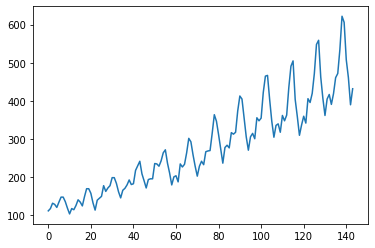

In [6]:
flights.passengers.plot()

In [27]:
#Orjinal dosyayi kopyaladik

flights_copy = flights.copy()

In [28]:
#passenger columnda random nan values olusturduk

flights_copy.loc[np.random.randint(1,144,20), "passengers"] = np.nan

In [29]:
flights_copy.isnull().sum()

year           0
month          0
passengers    16
dtype: int64

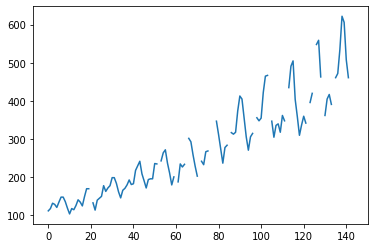

In [30]:
flights_copy.passengers.plot()

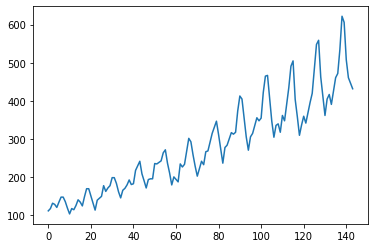

In [31]:
flights_copy.passengers.interpolate().plot()

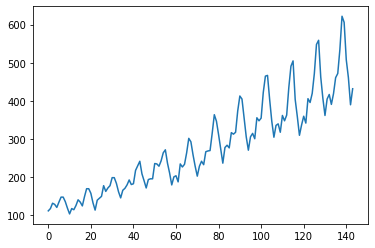

In [16]:
flights.passengers.plot()

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 07</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

________